<a href="https://colab.research.google.com/github/tnnkhang2211/AI/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers.attention.multi_head_attention import activation
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, normalization, LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [ ]:
folder='/content/drive/MyDrive/flowertraining/Flowers/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('daisy'):
    output = 1.0
  if file.startswith('dandelion'):
    output = 2.0
  if file.startswith('rose'):
    output = 3.0
  if file.startswith('sunflower'):
    output = 4.0 
  if file.startswith('tulip'):
    output = 5.0
  photo = load_img(folder+file, target_size = (60,60))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(4317, 60, 60, 3) (4317,)


In [ ]:
# Save data 
save('/content/drive/MyDrive/flowertraining/Flowers_photos.npy', photos)
save('/content/drive/MyDrive/flowertraining/Flowers_labels.npy', labels)

In [ ]:
photos = np.load('/content/drive/MyDrive/flowertraining/Flowers_photos.npy')
labels = np.load('/content/drive/MyDrive/flowertraining/Flowers_labels.npy')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1, random_state=3)

In [ ]:
X_train.shape

(3885, 60, 60, 3)

In [ ]:
X_train.ndim

4

In [ ]:
y_train.shape

(3885,)

In [ ]:
X_test.shape

(432, 60, 60, 3)

In [ ]:
y_test.shape

(432,)

In [ ]:
X_train = X_train.astype('float32')/255
y_train = to_categorical(y_train, 6) 

X_test = X_test.astype('float32')/255
y_test = to_categorical(y_test, 6)

In [ ]:
y_train.shape

(3885, 6)

In [ ]:
y_test.shape

(432, 6)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(60, 60, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                  

In [ ]:
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(X_train, y_train, batch_size = 100, epochs = 100, verbose = 1)

Epoch 1/100
39/39 [==============================] - 10s 23ms/step - loss: 1.3770 - accuracy: 0.3889
Epoch 2/100
39/39 [==============================] - 1s 15ms/step - loss: 1.0770 - accuracy: 0.5632
Epoch 3/100
39/39 [==============================] - 1s 16ms/step - loss: 0.9605 - accuracy: 0.6224
Epoch 4/100
39/39 [==============================] - 1s 15ms/step - loss: 0.9228 - accuracy: 0.6332
Epoch 5/100
39/39 [==============================] - 1s 15ms/step - loss: 0.8375 - accuracy: 0.6782
Epoch 6/100
39/39 [==============================] - 1s 16ms/step - loss: 0.7568 - accuracy: 0.7066
Epoch 7/100
39/39 [==============================] - 1s 16ms/step - loss: 0.6604 - accuracy: 0.7506
Epoch 8/100
39/39 [==============================] - 1s 16ms/step - loss: 0.6032 - accuracy: 0.7743
Epoch 9/100
39/39 [==============================] - 1s 15ms/step - loss: 0.4928 - accuracy: 0.8208
Epoch 10/100
39/39 [==============================] - 1s 16ms/step - loss: 0.4179 - accuracy: 0.845

Test loss:  2.30855393409729
Test accuracy 0.6666666865348816


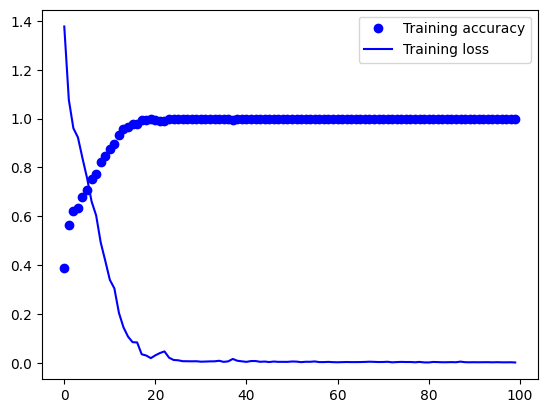

In [ ]:
test = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', test[0])
print('Test accuracy', test[1])
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()

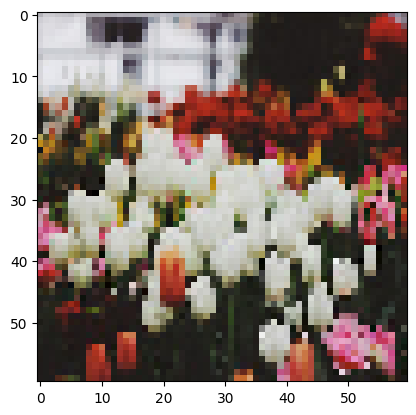

[0. 0. 0. 0. 0. 1.]


In [ ]:
img = X_test[156]
plt.imshow(img)
plt.show()
print(y_test[123])

In [ ]:
X_pred = X_test[123].reshape(1,60,60,3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 206ms/step


array([2])

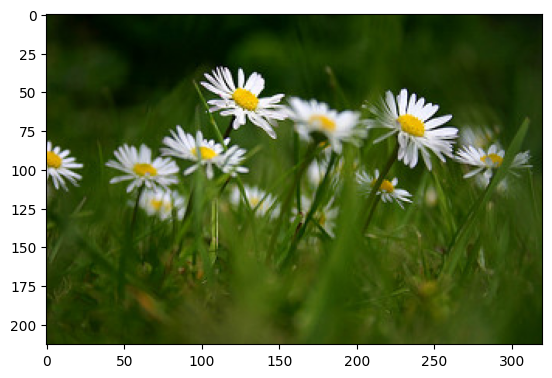

In [ ]:
# #IMPORT A PICTURE FOR MODEL PREDICT
url = '/content/drive/MyDrive/flowertraining/Flowers/daisy (15).jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

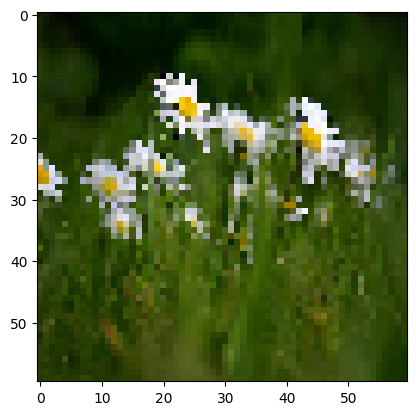

In [ ]:
img = load_img(url, target_size = (60,60,3))
plt.imshow(img)

In [ ]:
img = img_to_array(img)
img = img.reshape(1,60,60,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 31ms/step


array([1])

In [ ]:
model.save('/content/drive/MyDrive/flowertraining/model_flowers_save.h5')